<a href="https://colab.research.google.com/github/aumana/EOAI/blob/main/Minicurso_IA3_Intro3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentação semântica de imagens

Até agora, você viu a classificação de imagens, em que a tarefa da rede é atribuir um rótulo ou classe a uma imagem de entrada. No entanto, suponha que você queira saber onde um objeto está localizado na imagem, a forma desse objeto, qual pixel pertence a qual objeto etc. Nesse caso, você desejará segmentar a imagem, ou seja, para cada pixel da imagem é dado um rótulo. Assim, a tarefa da segmentação de imagens é treinar uma rede neural para produzir uma máscara da imagem em pixels. Isso ajuda a entender a imagem em um nível muito mais baixo, isto é, o nível de pixel. A segmentação de imagens tem muitas aplicações em imagens médicas, carros autônomos e imagens de satélite, para citar alguns.

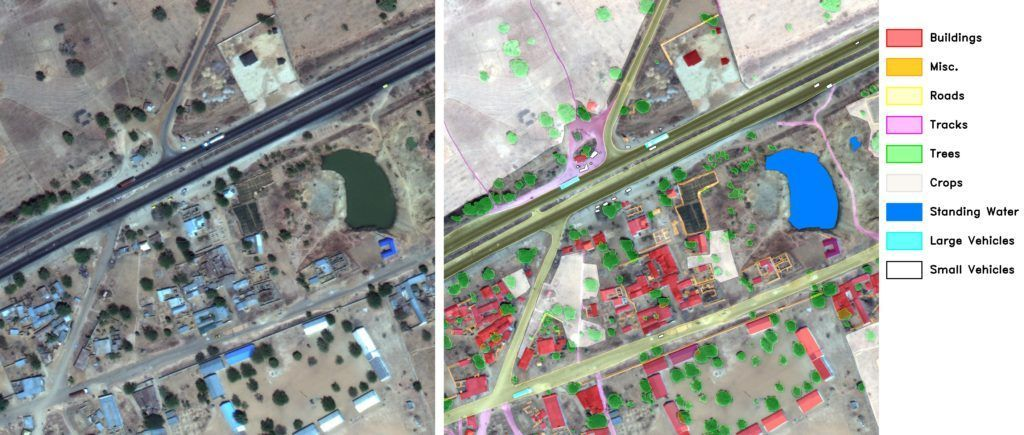

Mais precisamente, a segmentação semântica de imagens é a tarefa de rotular cada pixel da imagem em um conjunto predefinido de classes. Por exemplo, vários objetos como carros, árvores, pessoas, sinais de trânsito etc. podem ser usados como classes para segmentação semântica de imagens. Portanto, a tarefa é pegar uma imagem (RGB ou escala de cinza) e produzir uma matriz W x H x 1, onde W e H representam a largura e a altura da imagem, respectivamente. Cada célula nesta matriz conteria os IDs de classe previstos para cada pixel na imagem.

No Deep learning, expressamos rótulos de classe categórica como vetores codificados one-hot. Da mesma forma, na segmentação semântica, podemos expressar a matriz de saída usando um esquema de codificação one-hot essencialmente criando um canal para cada rótulo de classe e marcando as células por 1 que contêm o pixel da classe correspondente e marcando as células restantes por 0.

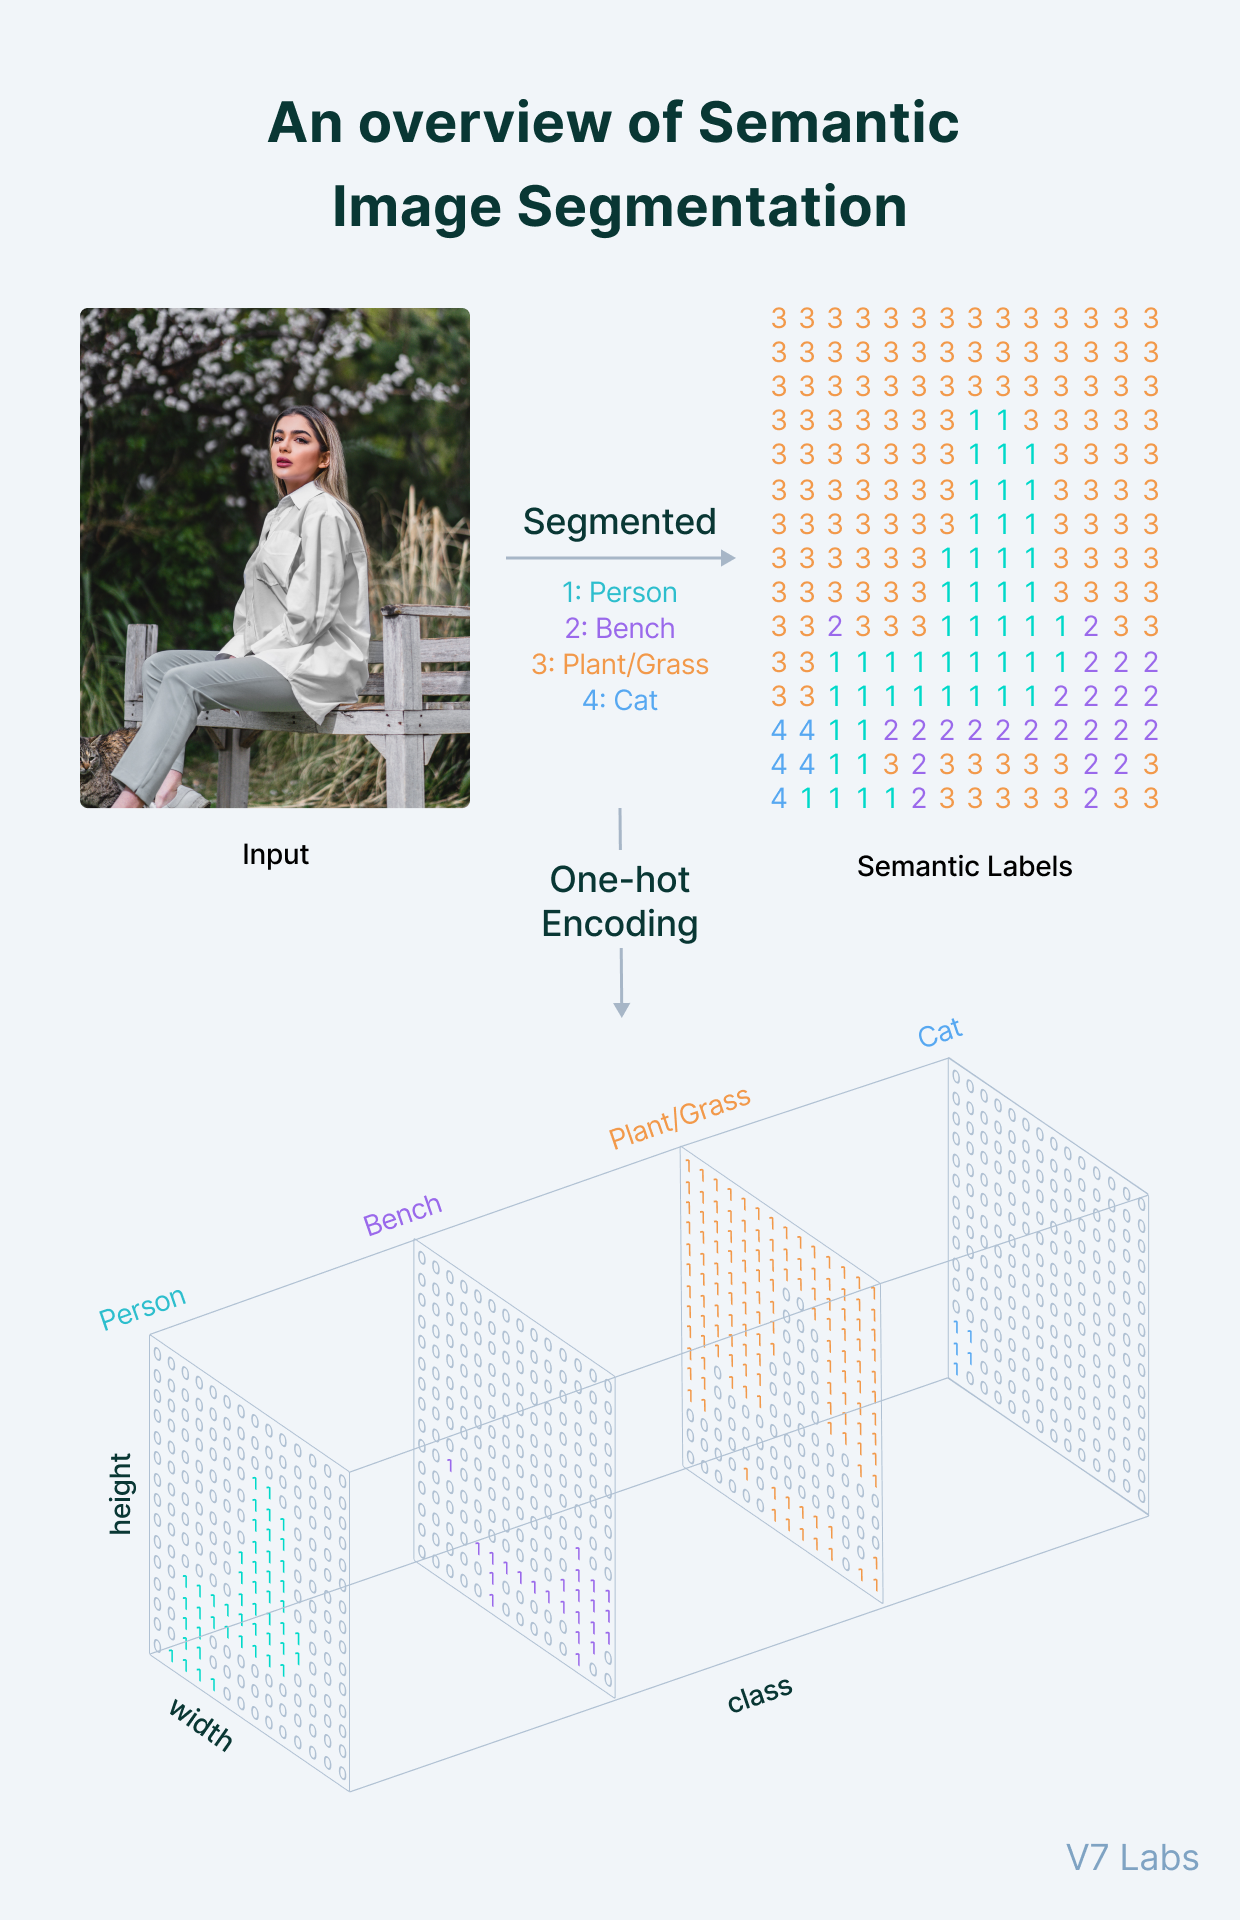

Como outras tarefas de visão computacional, usar uma CNN para segmentação semântica seria a escolha óbvia. Ao usar CNN para segmentação semântica, a saída seria uma imagem com a mesma resolução da entrada, diferentemente de um vetor de comprimento fixo no caso de classificação de imagens.
A arquitetura geral dos modelos contém uma série de camadas convolucionais juntamente com camadas convolucionais agrupadas ou strided para downsampling. Para melhorar o modelo, também são utilizadas ativações não lineares e camadas de normalização em lote.
As camadas iniciais em uma rede neural convolucional aprendem recursos de baixo nível, como linhas, bordas, cores, etc., e as camadas mais profundas aprendem recursos de alto nível, como rostos ou objetos, etc.

Agora que obtivemos esse tensor de baixa resolução, de alguma forma temos que aumentar sua resolução até a imagem original para cumprir a tarefa de segmentação semântica. Alimentamos este mapa de recursos de baixa resolução para camadas de upsampling seguidas por mais camadas de convolução para criar mapas de recursos de resolução mais alta. À medida que aumentamos a resolução, diminuímos simultaneamente o número de canais nos mapas de recursos. Este tipo de arquitetura é conhecido como arquitetura codificador-decodificador. A fase de downsampling é conhecida como codificador e a fase de upsampling é chamada de decodificador.

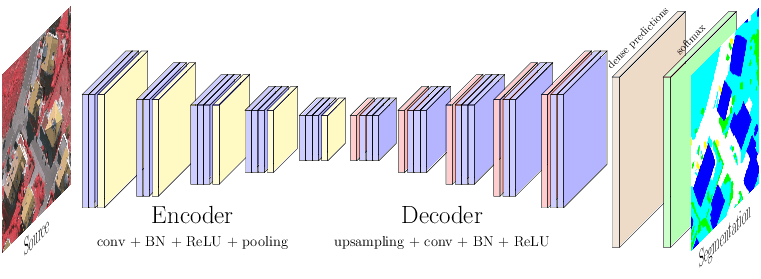

## U-Net

U-Net é uma arquitetura desenvolvida por Olaf Ronneberger et al. para Segmentação de Imagens Biomédicas em 2015 na Universidade de Freiburg, Alemanha. É uma das abordagens mais popularmente usadas em qualquer tarefa de segmentação semântica hoje. É uma rede neural totalmente convolucional projetada para aprender com menos amostras de treinamento. É uma melhoria em relação ao FCN existente – “Redes totalmente convolucionais para segmentação semântica” desenvolvido por Jonathan Long et al. em 2014).

U-Net é uma arquitetura de rede codificador-decodificador em forma de U, que consiste em quatro blocos codificadores e quatro blocos decodificadores conectados por meio de uma ponte. A rede do codificador (caminho de contração) metade das dimensões espaciais e o dobro do número de filtros (canais de recursos) em cada bloco do codificador. Da mesma forma, a rede de decodificadores dobra as dimensões espaciais e metade do número de canais de recursos.

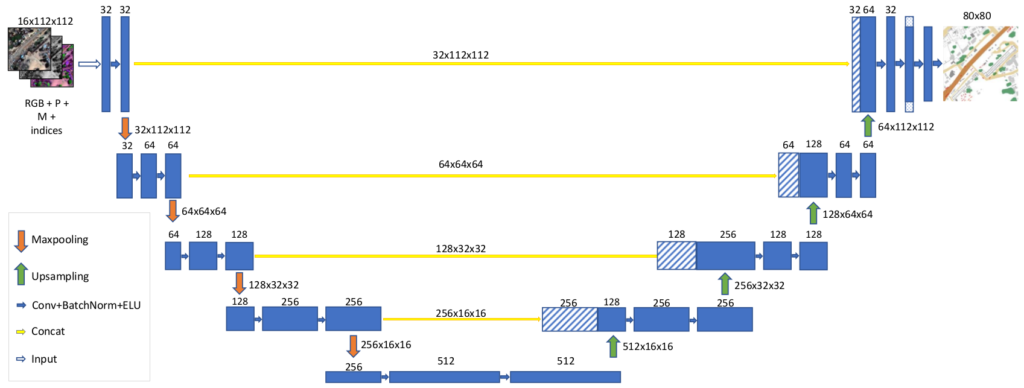

Codificador

O codificador atua como o extrator de recursos e aprende uma representação abstrata da imagem de entrada por meio de uma sequência de blocos do codificador. Cada bloco do codificador consiste em duas convoluções 3x3, onde cada convolução é seguida por uma função de ativação ReLU (Rectified Linear Unit). A função de ativação ReLU introduz não linearidade na rede, o que ajuda na melhor generalização dos dados de treinamento. A saída do ReLU atua como uma conexão de salto para o bloco decodificador correspondente.
Em seguida, segue um 2x2 max-pooling, onde as dimensões espaciais (altura e largura) dos mapas de recursos são reduzidas pela metade. Isso reduz o custo computacional diminuindo o número de parâmetros treináveis.

As skips connection fornecem informações adicionais que ajudam o decodificador a gerar melhores recursos semânticos. Eles também atuam como uma conexão de atalho que ajuda o fluxo indireto de gradientes para as camadas anteriores sem qualquer degradação. Em termos simples, podemos dizer que a skip connection ajuda no melhor fluxo de gradiente enquanto backpropagation, o que por sua vez ajuda a rede a aprender uma melhor representação.




Decodificador

O decodificador é usado para pegar a representação abstrata e gerar uma máscara de segmentação semântica. O bloco decodificador começa com uma convolução de transposição 2x2. Em seguida, ele é concatenado com o mapa de recursos da skip connection correspondente do bloco do codificador. Essas skips connections fornecem recursos de camadas anteriores que às vezes são perdidos devido à profundidade da rede. Depois disso, são utilizadas duas convoluções 3x3, onde cada convolução é seguida por uma função de ativação ReLU.
A saída do último decodificador passa por uma convolução 1x1 com ativação sigmóide. A função de ativação sigmóide fornece a máscara de segmentação que representa a classificação pixel a pixel.

Neste exemplo vamos criar um modelo para segmentar áreas de eucalipto em imagens do Sentinel 2. Para isso selecionamos algumas áreas onde foram coletadas os poligonos de área de eucalipto. Esse poligono foi convertido em uma imagem máscara que será usada junta com a imagem do sentinel 2 para treinarmos o modelo.

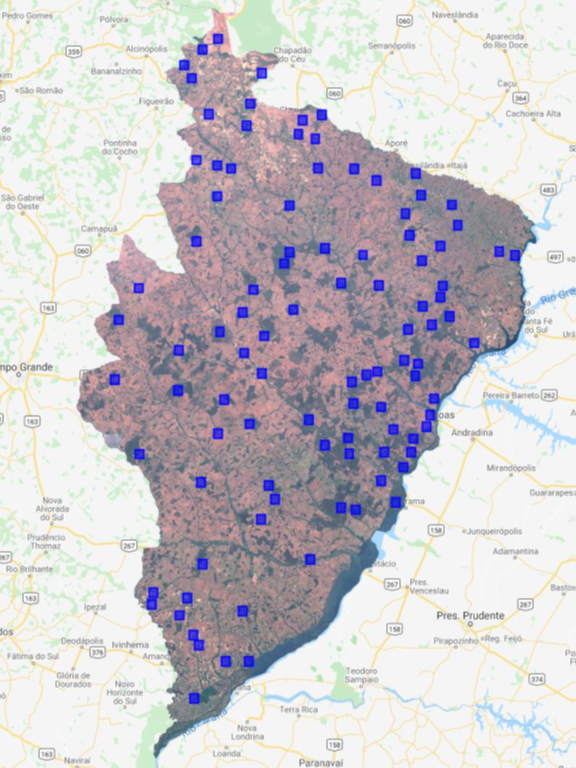

Foram selecionadas 10 bandas do sentinel 2: B02, B03, B04, B05, B06, B07, B08, B08A, B11 e B12. Também foram selecionadas imagens de 3 períodos do ano diferentes.

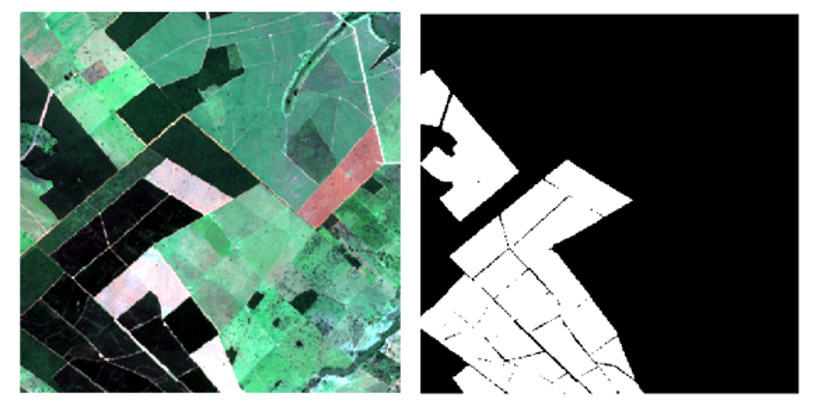

Link para acessar o dataset: https://drive.google.com/drive/folders/1S1Ng8mzspJWMqQY9F2jOpVFmrrKY-i-1?usp=sharing

O dataset já está preparado, então começamos instalando o rasterio e importando algumas bibliotecas:

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 51.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import rasterio
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from rasterio.merge import merge
from rasterio.windows import Window

Definimos os caminhos para as imagens e mascaras das três diferentes épocas do ano:

In [ ]:
path_img_dry = 'drive/My Drive/Datasets/ForestryView/data/2019_dry_img'
path_img_wet = 'drive/My Drive/Datasets/ForestryView/data/2019_wet_img'
path_mask_dry = 'drive/My Drive/Datasets/ForestryView/data/2019_dry_tgt'
path_mask_wet = 'drive/My Drive/Datasets/ForestryView/data/2019_wet_tgt'
path_img_int = 'drive/My Drive/Datasets/ForestryView/data/2019_int_img'
path_mask_int = 'drive/My Drive/Datasets/ForestryView/data/2019_int_tgt'

In [ ]:
X_wet = []
images_files_wet = [f for f in os.listdir(path_img_wet)]
for i in range(len(images_files_wet)):
  import_raster = os.path.join(path_img_wet,'img_' + str(i+1) + '.tif')
  print(i)
  with rasterio.open(import_raster) as src:
    im = src.read()
  im = im.transpose([1,2,0])
  im = np.nan_to_num(im)
  im = im[:,:,0:10]
  full_img = im.copy()
  print(full_img.shape)
  if (full_img.shape[0] == 335):
    full_img = full_img[1:,:,:]
  if (full_img.shape[1] == 335):
    full_img = full_img[:,1:,:]
  full_img = full_img[7:-7,7:-7,:]
  X_wet.append(full_img)
X_wet = np.array(X_wet)
print(X_wet.shape)



Y_wet = []
mask_files_wet = [f for f in os.listdir(path_mask_wet)]
for i in range(len(mask_files_wet)):
  import_raster = os.path.join(path_mask_wet,'tgt_' + str(i+1) + '.tif')
  with rasterio.open(import_raster) as src:
    im = src.read()
  im = im.transpose([1,2,0])
  print(im.shape)
  if (im.shape[0] == 335):
    im = im[1:,:,:]
  if (im.shape[1] == 335):
    im = im[:,1:,:]
  im = im[7:-7,7:-7,:]
  Y_wet.append(im)
Y_wet = np.array(Y_wet)
print(Y_wet.shape)

0
(335, 335, 10)
1


In [ ]:
X_dry = []
images_files_dry = [f for f in os.listdir(path_img_dry)]
for i in range(len(images_files_dry)):
  import_raster = os.path.join(path_img_dry,'img_' + str(i+1) + '.tif')
  print(i)
  with rasterio.open(import_raster) as src:
    im = src.read()
  im = im.transpose([1,2,0])
  im = np.nan_to_num(im)
  im = im[:,:,0:10]
  full_img = im.copy()
  print(full_img.shape)
  if (full_img.shape[0] == 335):
    full_img = full_img[1:,:,:]
  if (full_img.shape[1] == 335):
    full_img = full_img[:,1:,:]
  full_img = full_img[7:-7,7:-7,:]
  X_dry.append(full_img)
X_dry = np.array(X_dry)
print(X_dry.shape)



Y_dry = []
mask_files_dry = [f for f in os.listdir(path_mask_dry)]
for i in range(len(mask_files_dry)):
  import_raster = os.path.join(path_mask_dry,'tgt_' + str(i+1) + '.tif')
  with rasterio.open(import_raster) as src:
    im = src.read()
  im = im.transpose([1,2,0])
  print(im.shape)
  if (im.shape[0] == 335):
    im = im[1:,:,:]
  if (im.shape[1] == 335):
    im = im[:,1:,:]
  im = im[7:-7,7:-7,:]
  Y_dry.append(im)
Y_dry = np.array(Y_dry)
print(Y_dry.shape)

In [ ]:
X_int = []
images_files_int = [f for f in os.listdir(path_img_int)]
for i in range(len(images_files_int)):
  import_raster = os.path.join(path_img_int,'img_' + str(i+1) + '.tif')
  print(i)
  with rasterio.open(import_raster) as src:
    im = src.read()
  im = im.transpose([1,2,0])
  im = np.nan_to_num(im)
  im = im[:,:,0:10]
  full_img = im.copy()
  print(full_img.shape)
  if (full_img.shape[0] == 335):
    full_img = full_img[1:,:,:]
  if (full_img.shape[1] == 335):
    full_img = full_img[:,1:,:]
  full_img = full_img[7:-7,7:-7,:]
  X_int.append(full_img)
X_int = np.array(X_int)
print(X_int.shape)



Y_int = []
mask_files_int = [f for f in os.listdir(path_mask_int)]
for i in range(len(mask_files_int)):
  import_raster = os.path.join(path_mask_int,'tgt_' + str(i+1) + '.tif')
  with rasterio.open(import_raster) as src:
    im = src.read()
  im = im.transpose([1,2,0])
  print(im.shape)
  if (im.shape[0] == 335):
    im = im[1:,:,:]
  if (im.shape[1] == 335):
    im = im[:,1:,:]
  im = im[7:-7,7:-7,:]
  Y_int.append(im)
Y_int = np.array(Y_int)
print(Y_int.shape)

Após importar os dados separamos uma parte para treinar e uma parte para testar. E assim concatenamos em uma variável para as imagens de treino, outra para teste. Fazemos isso para as mascaras também.

In [ ]:
X_wet_train = X_wet[0:90,:,:,:].copy()
Y_wet_train = Y_wet[0:90,:,:,:].copy()
X_dry_train = X_dry[0:90,:,:,:].copy()
Y_dry_train = Y_dry[0:90,:,:,:].copy()
X_int_train = X_int[0:90,:,:,:].copy()
Y_int_train = Y_int[0:90,:,:,:].copy()


X_wet_test = X_wet[90:109,:,:,:].copy()
Y_wet_test = Y_wet[90:109,:,:,:].copy()
X_dry_test = X_dry[90:109,:,:,:].copy()
Y_dry_test = Y_dry[90:109,:,:,:].copy()
X_int_test = X_int[90:109,:,:,:].copy()
Y_int_test = Y_int[90:109,:,:,:].copy()



x_train = np.concatenate((X_wet_train,X_dry_train,X_int_train))
y_train = np.concatenate((Y_wet_train,Y_dry_train,Y_int_train))
x_test = np.concatenate((X_wet_test,X_dry_test,X_int_test))
y_test = np.concatenate((Y_wet_test,Y_dry_test,Y_int_test))

In [ ]:
del X_wet, X_dry, X_int, Y_wet, Y_dry, Y_int

In [ ]:
print(np.unique(y_test, return_counts=True))
print(np.unique(y_train, return_counts=True))

In [ ]:
x_test.shape

(57, 320, 320, 10)

In [ ]:
y_test.shape

(57, 320, 320, 1)

Vamos Agora plotar um exemplo em RGB:

In [ ]:
R = x_test[8,:,:,2]*4
G = x_test[8,:,:,1]*4
B = x_test[8,:,:,0]*4

rgb = np.dstack((R,G,B))
plt.figure(figsize=[12,12])
plt.imshow(rgb)
plt.axis('off')

(-0.5, 319.5, 319.5, -0.5)

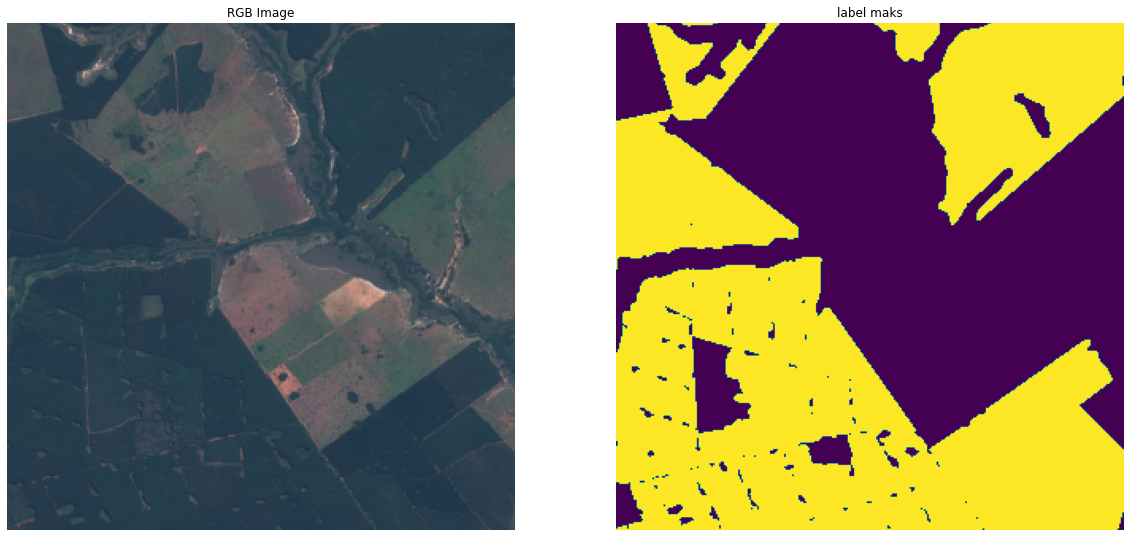

In [ ]:
i = 1
R = x_test[i,:,:,2]*4
G = x_test[i,:,:,1]*4
B = x_test[i,:,:,0]*4
rgb = np.dstack((R,G,B))
plt.figure(figsize=[20,20])
plt.subplot(121)
plt.imshow(rgb)
plt.title('RGB Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(y_test[i,:,:,0])
plt.title('label maks')
plt.axis('off')

O próximo passo é importar as funções do Keras, implemetar o aumento de dados no dataset de treinamento, construir a arquitetura e iniciar o treinamento:

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Concatenate, add, Conv2DTranspose, BatchNormalization, Dropout, Activation, Add, AveragePooling2D, Lambda, SeparableConv2D, GlobalAveragePooling2D, DepthwiseConv2D, ZeroPadding2D, LeakyReLU
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from keras.activations import relu
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import binary_crossentropy
from keras import backend as K
import tensorflow as tf
from keras.models import load_model

In [ ]:
def jaccard_coef(y_true, y_pred,smooth=100):
  # __author__ = Vladimir Iglovikov
  intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
  sum_ = K.sum(y_true + y_pred, axis=[0, -1, -2])

  jac = (intersection + smooth) / (sum_ - intersection + smooth)

  return K.mean(jac)

In [ ]:
def dice_coef(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (
                K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)


def bce_dice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) + dice_coef_loss(y_true, y_pred)

In [ ]:
img_datagen = ImageDataGenerator(
    rotation_range=90,
    vertical_flip = True,
    horizontal_flip=True,
    zoom_range = 0.2)

mask_datagen = ImageDataGenerator(
    rotation_range=90,
    vertical_flip = True,
    horizontal_flip=True,
    zoom_range = 0.2)

In [ ]:
img_datagen.fit(x_train, augment=True,seed=1200)
mask_datagen.fit(y_train, augment=True,seed=1200)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (270, 320, 320, 10) (10 channels).
  ' channels).')


In [ ]:
X=img_datagen.flow(x_train,batch_size=8,seed=1200)
Y=mask_datagen.flow(y_train,batch_size=8,seed=1200)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (270, 320, 320, 10) (10 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


In [ ]:
train_generator = zip(X, Y)

In [ ]:
steps_per_epoch = len(x_train)//8
validation_steps = len(x_test)//8

In [ ]:
def conv_block(input_tensor, filters, strides, d_rates):
    x = Conv2D(filters[0], kernel_size=1, kernel_initializer='he_uniform', dilation_rate=d_rates[0])(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters[1], kernel_size=3, strides=strides, kernel_initializer='he_uniform', padding='same', dilation_rate=d_rates[1])(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters[2], kernel_size=1, kernel_initializer='he_uniform', dilation_rate=d_rates[2])(x)
    x = BatchNormalization()(x)

    shortcut = Conv2D(filters[2], kernel_size=1, kernel_initializer='he_uniform', strides=strides)(input_tensor)
    shortcut = BatchNormalization()(shortcut)

    x = add([x, shortcut])
    x = Activation('relu')(x)

    return x


def identity_block(input_tensor, filters, d_rates):
    x = Conv2D(filters[0], kernel_size=1, kernel_initializer='he_uniform', dilation_rate=d_rates[0])(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters[1], kernel_size=3, kernel_initializer='he_uniform', padding='same', dilation_rate=d_rates[1])(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters[2], kernel_size=1, kernel_initializer='he_uniform', dilation_rate=d_rates[2])(x)
    x = BatchNormalization()(x)

    x = add([x, input_tensor])
    x = Activation('relu')(x)

    return x

def one_side_pad(x):
    x = ZeroPadding2D((1, 1))(x)
    x = Lambda(lambda x: x[:, :-1, :-1, :])(x)
    return x

In [ ]:
droprate = 0.3
inputs = Input(shape=x_train.shape[1:])
conv_1 = Conv2D(32, (3, 3), strides=(1, 1), kernel_initializer='he_uniform', padding='same')(inputs)
conv_1 = BatchNormalization()(conv_1)
conv_1 = Activation("relu")(conv_1)
f1 = conv_1

conv_2 = Conv2D(64, (3, 3), strides=(2, 2), kernel_initializer='he_uniform', padding='same')(conv_1)
conv_2 = BatchNormalization()(conv_2)
conv_2 = Activation("relu")(conv_2)

conv_3 = Conv2D(64, (3, 3), strides=(1, 1), kernel_initializer='he_uniform', padding='same')(conv_2)
conv_3 = BatchNormalization()(conv_3)
conv_3 = Activation("relu")(conv_3)

f2 = conv_3


pool_1 = MaxPooling2D((2, 2), strides=(2, 2))(conv_3)

conv_block1 = conv_block(pool_1, filters=[64, 64, 128], strides=(1, 1), d_rates=[1, 1, 1])
identity_block1 = identity_block(conv_block1, filters=[64, 64, 128], d_rates=[1, 2, 1])
identity_block2 = identity_block(identity_block1, filters=[64, 64, 128], d_rates=[1, 3, 1])
f3 = identity_block2

conv_block2 = conv_block(identity_block2, filters=[128, 128, 256], strides=(2, 2), d_rates=[1, 1, 1])
identity_block3 = identity_block(conv_block2, filters=[128, 128, 256], d_rates=[1, 2, 1])
identity_block4 = identity_block(identity_block3, filters=[128, 128, 256], d_rates=[1, 3, 1])
identity_block5 = identity_block(identity_block4, filters=[128, 128, 256], d_rates=[1, 4, 1])
f4 = identity_block5


identity_block10 = conv_block(identity_block5, filters=[256, 256, 512], strides=(2, 2), d_rates=[1, 1, 1])
for i in range(25):
  identity_block10 = identity_block(identity_block10, filters=[256, 256, 512], d_rates=[1, 2, 1])

f5 = identity_block10

conv_block4 = conv_block(identity_block10, filters=[512, 512, 1024], strides=(2, 2), d_rates=[1, 1, 1])
identity_block11 = identity_block(conv_block4, filters=[512, 512, 1024], d_rates=[1, 4, 1])
identity_block12 = identity_block(identity_block11, filters=[512, 512, 1024], d_rates=[1, 4, 1])
f6 = identity_block12

o = f6

o = (BatchNormalization())(o)
o = Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Dropout(droprate)(o)


o = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(o)
o = (concatenate([o, f5]))
o = (BatchNormalization())(o)
o = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Dropout(droprate)(o)



o = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(o)
o = (concatenate([o, f4]))
o = (BatchNormalization())(o)
o = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Dropout(droprate)(o)



o = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(o)
o = (concatenate([o, f3]))
o = (BatchNormalization())(o)
o = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Dropout(droprate)(o)



o = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(o)
o = (concatenate([o, f2]))
o = (BatchNormalization())(o)
o = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Dropout(droprate)(o)


o = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(o)
o = (concatenate([o, f1]))
o = (BatchNormalization())(o)
o = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)


o = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(o)

model = Model(inputs=inputs, outputs=o)
model.compile(optimizer=Adam(lr = 1e-5,decay=1e-6), loss = dice_coef_loss, metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 320, 320, 1  0           []                               
                                0)]                                                               
                                                                                                  
 conv2d (Conv2D)                (None, 320, 320, 32  2912        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 320, 320, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 conv2d_15 (Conv2D)             (None, 40, 40, 256)  33024       ['activation_13[0][0]']          
                                                                                                  
 conv2d_16 (Conv2D)             (None, 40, 40, 256)  33024       ['activation_11[0][0]']          
                                                                                                  
 batch_normalization_15 (BatchN  (None, 40, 40, 256)  1024       ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_16 (BatchN  (None, 40, 40, 256)  1024       ['conv2d_16[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_3 (Ad

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=steps_per_epoch, validation_steps=validation_steps,
                              epochs=300, validation_data=(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/300
33/33 [==============================] - 52s 756ms/step - loss: 0.6956 - accuracy: 0.4752 - val_loss: 0.6652 - val_accuracy: 0.2571
Epoch 2/300
33/33 [==============================] - 21s 583ms/step - loss: 0.6384 - accuracy: 0.4852 - val_loss: 0.6594 - val_accuracy: 0.2569
Epoch 3/300
33/33 [==============================] - 19s 587ms/step - loss: 0.6618 - accuracy: 0.4870 - val_loss: 0.6534 - val_accuracy: 0.2717
Epoch 4/300
33/33 [==============================] - 19s 590ms/step - loss: 0.6248 - accuracy: 0.5398 - val_loss: 0.6452 - val_accuracy: 0.3462
Epoch 5/300
33/33 [==============================] - 19s 596ms/step - loss: 0.6031 - accuracy: 0.5778 - val_loss: 0.6340 - val_accuracy: 0.4536
Epoch 6/300
33/33 [==============================] - 19s 592ms/step - loss: 0.5970 - accuracy: 0.6230 - val_loss: 0.6195 - val_accuracy: 0.6185
Epoch 7/300
33/33 [==============================] - 19s 590ms/step - loss: 0.5801 - accuracy: 0.6725 - val_loss: 0.5952 - val_accuracy:

Assim podemos aplicar o predict nos dados de teste e comparar os resultados:

In [ ]:
predict = loaded_model.predict(x_test)

(-0.5, 319.5, 319.5, -0.5)

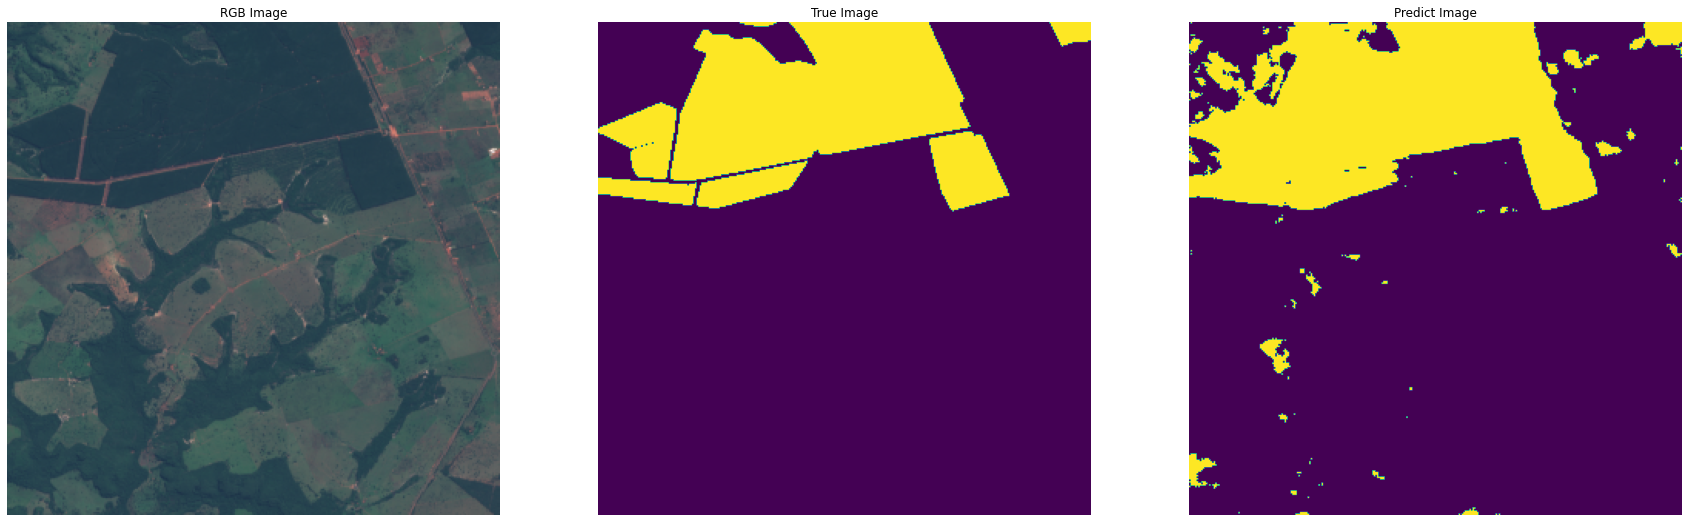

In [ ]:
i = 2
R = x_test[i,:,:,2]*4
G = x_test[i,:,:,1]*4
B = x_test[i,:,:,0]*4
rgb = np.dstack((R,G,B))
plt.figure(figsize=[30,30])
plt.subplot(131)
plt.imshow(rgb)
plt.title('RGB Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(np.round(y_test[i,:,:,0]))
plt.title('True Image')
plt.axis('off')
plt.subplot(133)
plt.imshow(np.round(predict[i,:,:,0]))
plt.title('Predict Image')
plt.axis('off')